# HEALTHCARE

## Diabetes Classification
### Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### Dictionary


Following are the variables with their definition and key:

|Variables|Description|
|:-|:-|
|Pregnancies|Number of times pregnant|
|Glucose Plasma| glucose concentration in an oral glucose tolerance test|
|BloodPressure |Diastolic blood pressure (mm Hg)|
|SkinThickness|Triceps skinfold thickness (mm)|
|Insulin |Two hour serum insulin|
|BMI| Body Mass Index|
|DiabetesPedigreeFunction|Diabetes pedigree function|
|Age|Age in Years|
|Outcome|Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.	

In [37]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [38]:
#extracting the dataset
df=pd.read_csv(r'D:\simplilearn\Project 1\Project 2\Healthcare - Diabetes\health care diabetes.csv')

In [39]:
#shape of the dataset
df.shape

(768, 9)

In [40]:
#size of the dataset
df.size

6912

In [41]:
#information about hte columns and datatypes
df.info()

#The datatypes of datasets are float and integers. This dataset does not have object(string) datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
#Viewing dataset
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


## Descriptive Data Analysis

In [43]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
df['Glucose'].value_counts()[:10]

99     17
100    17
111    14
129    14
125    14
106    14
112    13
108    13
95     13
105    13
Name: Glucose, dtype: int64

##### from above insulin, glucose and bloodpressure may have outliers because of the large difference between min and max of the variable values.

##### 1) Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
Glucose 

BloodPressure

SkinThickness

Insulin

BMI 

####  Finding Missing values and treating these missing values
To make our data trainable,it is important to treat the missing values
1) Substituting the missing values with the mean or median
#### Median is more preferred as it is more robust to outliers
2) Dropping the columns for the instances where majority(>30%) of the data is missing

In [45]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# There are zeroes in the Glucose,BloodPressure,SkinThickness,Insulin,BMI features which is not possible in medical terms. 
# So we treat it by replacing with median values to get a normal distribution

In [12]:
# Median is used to remove skewness rather than mean as it is effected by mean

In [46]:
#Glucose
def zero_imp(cols):
    imp=cols[0]
    if imp==0:
        return df['Glucose'].median()
    else:
        return imp
df['Glucose']=df[['Glucose']].apply(zero_imp,axis=1)

In [47]:
# BloodPressure
def zero_imp(cols):
    imp=cols[0]
    if imp==0:
        return df['BloodPressure'].median()
    else:
        return imp
df['BloodPressure']=df[['BloodPressure']].apply(zero_imp,axis=1)

In [48]:
#SkinThickness
def zero_imp(cols):
    imp=cols[0]
    if imp==0:
        return df['SkinThickness'].median()
    else:
        return imp
df['SkinThickness']=df[['SkinThickness']].apply(zero_imp,axis=1)

In [49]:
#Insulin
def zero_imp(cols):
    imp=cols[0]
    if imp==0:
        return df['Insulin'].median()
    else:
        return imp
df['Insulin']=df[['Insulin']].apply(zero_imp,axis=1)

In [50]:
#BMI
def zero_imp(cols):
    imp=cols[0]
    if imp==0:
        return df['BMI'].median()
    else:
        return imp
df['BMI']=df[['BMI']].apply(zero_imp,axis=1)

### Univariate Analysis

##### As the datas are numeric continuous variables, usage of Histogram is efficient.

99.0     17
100.0    17
117.0    16
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 135, dtype: int64


Text(0.5, 1.0, 'Glucose- Frequency')

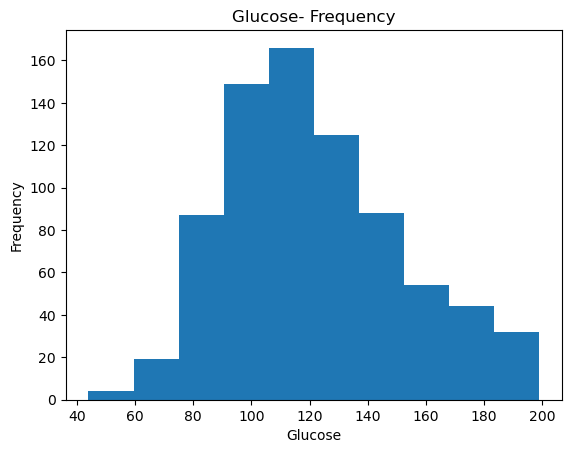

In [51]:
#Glucose
print(df['Glucose'].value_counts())
plt.hist(x=df['Glucose'])
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Glucose- Frequency')

###### inference:- The glucose level between 117 is more frequent in people than other glucose levels. Only less than 40 people got higher glucose  level that is from 180 to200.

Text(0.5, 1.0, 'BloodPressure- Frequency')

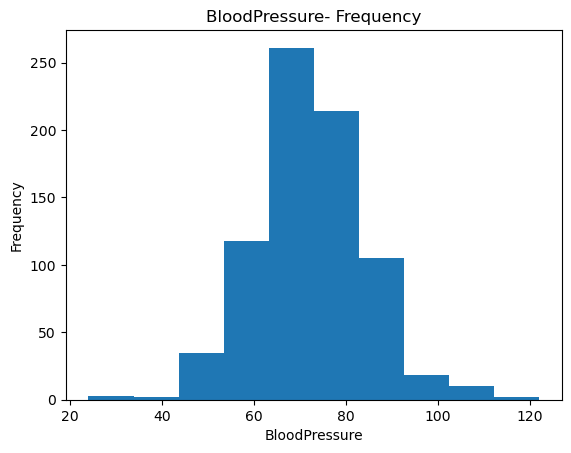

In [52]:
#BloodPressure
plt.hist(x=df['BloodPressure'])
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.title('BloodPressure- Frequency')

###### inference:- Among 768 people,250 people got pressure between 60 and 70. The pressure  greater than 20  but less than 45 and also between 110 and greater than 120 seen in less people.

Text(0.5, 1.0, 'SkinThickness- Frequency')

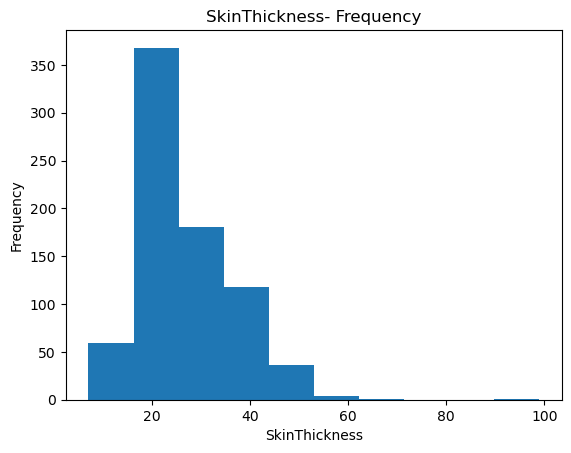

In [53]:
#SkinThickness
plt.hist(x=df['SkinThickness'])
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.title('SkinThickness- Frequency')

#### inference :- 350 people out of 768 have skin thickness closer to 20 but greater than 25

Text(0.5, 1.0, 'Insulin- Frequency')

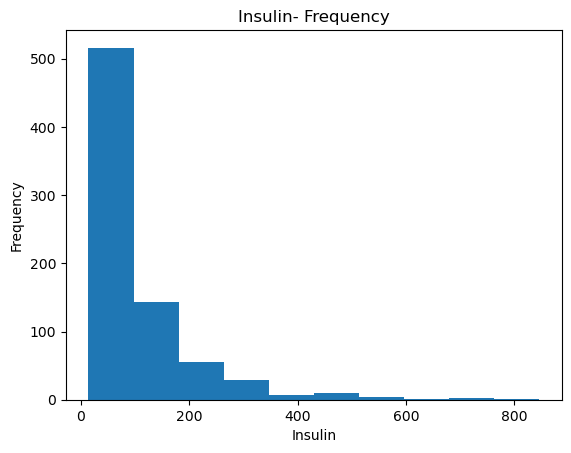

In [54]:
#Insulin
plt.hist(x=df['Insulin'])
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Insulin- Frequency')

#### inference :- Most of the people take less than 200 serum insulin

Text(0.5, 1.0, 'BMI- Frequency')

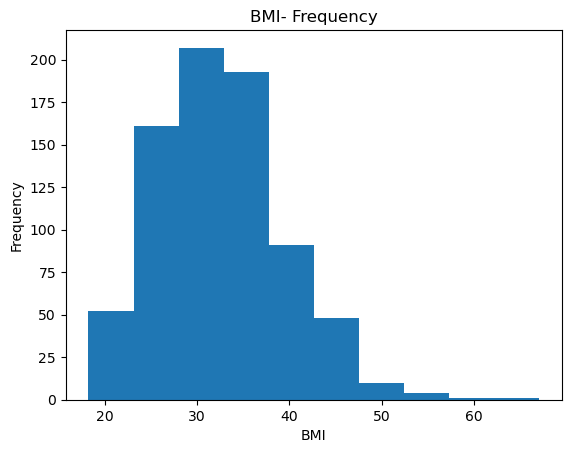

In [55]:
#BMI
plt.hist(x=df['BMI'])
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI- Frequency')

##### inference:- 200 people have the Index between 25 and 35. Only a few people have highest bmi that is between 55 to 65

##### 3) There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [56]:
df.dtypes.value_counts()


float64    6
int64      3
dtype: int64

<AxesSubplot:ylabel='count'>

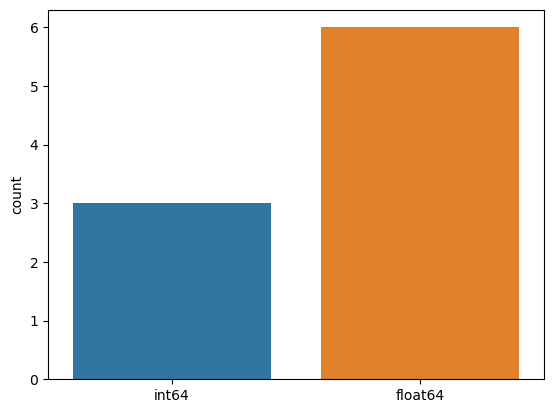

In [57]:
sns.countplot(x= df.dtypes ,data=df)
#There are 6 variables have float data type
# And there are 3 variables with integer data type

##### 4) Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

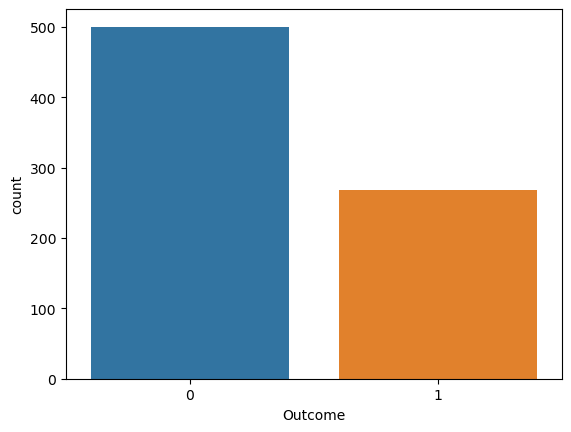

In [58]:
sns.countplot(x= df['Outcome'] ,data=df)

##### inference:- From the above countplot, it can be seen the number of zeroes are more than ones in the dependent variable. The one class is under sampled, it may lead to misclassification. As the majority of the class belong to zero, the model will be biased towards no diabetics classification. So use SMOTE (Synthetic Minority Oversampling Technique) technique. It is a tool used to oversample minority class by using k nearest neighbor to select random forest neighbor to synthetically create new nstance in the feature space.

#### SMOTE

In [106]:
#install imblearn(imbalanced learn) is a library used for balancing the data.
from imblearn.over_sampling import SMOTE
# Resampling the minority class.
sm = SMOTE(sampling_strategy='minority', random_state=2)
# Fit the model to generate the data.
X, Y = sm.fit_resample(df.drop('Outcome', axis=1), df['Outcome'])
df_1 = pd.concat([pd.DataFrame(Y), pd.DataFrame(X)], axis=1)
df_1.shape

(1000, 9)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

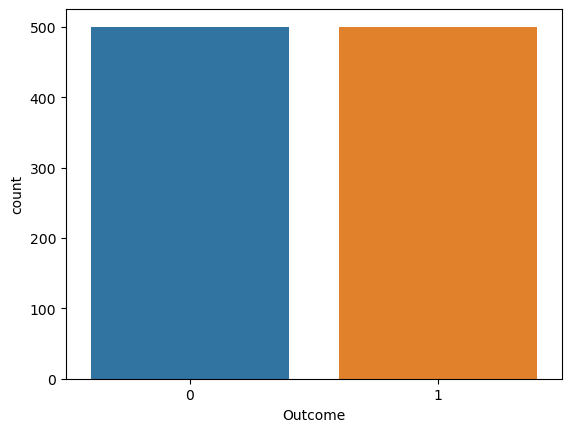

In [60]:
sns.countplot(x= df_1['Outcome'],data=df_1)

In [61]:
# To check the accuracy and precsion of smote

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
model= LogisticRegression(solver="liblinear")
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.81      0.74      0.77       170
           1       0.74      0.81      0.78       160

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.78      0.77      0.77       330



##### ADASYN
###### Adasyn is another way to balance the data sample set

In [63]:
from imblearn.over_sampling import ADASYN

In [103]:
sm = ADASYN(sampling_strategy='minority', random_state=2)
# Fit the model to generate the data.
X, Y = sm.fit_resample(df.drop('Outcome', axis=1), df['Outcome'])
df_1 = pd.concat([pd.DataFrame(Y), pd.DataFrame(X)], axis=1)
df_1.shape

(965, 9)

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
model= LogisticRegression(solver="liblinear")
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       168
           1       0.73      0.73      0.73       151

    accuracy                           0.74       319
   macro avg       0.74      0.74      0.74       319
weighted avg       0.74      0.74      0.74       319



##### SMOTEEN

In [113]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(sampling_strategy='all', random_state = 2)
#Fit the model to generate the data.
X, Y = sm.fit_resample(df.drop('Outcome', axis=1), df['Outcome'])
df_1 = pd.concat([pd.DataFrame(Y), pd.DataFrame(X)], axis=1)
df_1.shape

(548, 9)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
model= LogisticRegression(solver="liblinear")
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.88        99

    accuracy                           0.87       181
   macro avg       0.87      0.87      0.87       181
weighted avg       0.87      0.87      0.87       181



#### From these computations,SMOTEEN can be used to counteract the balance between the classes. It uses SMOTE as well as nearest neighbor of datapoints. 

In [68]:
#every columns have varaince less than 0.5. So, no columns are dropped.
df_1.corr()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,1.000000,0.315446,0.712578,0.321710,0.324779,0.155636,0.492898,0.209697,0.382581
Pregnancies,0.315446,1.000000,0.108095,0.258963,0.112812,-0.051950,0.053016,0.002821,0.609378
Glucose,0.712578,0.108095,1.000000,0.270314,0.263210,0.343139,0.410251,0.220780,0.252802
BloodPressure,0.321710,0.258963,0.270314,1.000000,0.256139,0.036654,0.327331,0.036041,0.392703
SkinThickness,0.324779,0.112812,0.263210,0.256139,1.000000,0.275590,0.575560,0.209705,0.163133
Insulin,0.155636,-0.051950,0.343139,0.036654,0.275590,1.000000,0.149931,0.153001,-0.009897
BMI,0.492898,0.053016,0.410251,0.327331,0.575560,0.149931,1.000000,0.179182,0.117516
DiabetesPedigreeFunction,0.209697,0.002821,0.220780,0.036041,0.209705,0.153001,0.179182,1.000000,0.058707
Age,0.382581,0.609378,0.252802,0.392703,0.163133,-0.009897,0.117516,0.058707,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

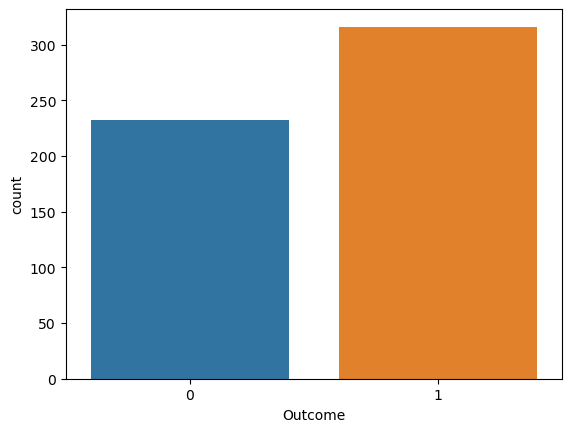

In [69]:
sns.countplot(x= df_1['Outcome'],data=df_1)

##### smoteen is used as it gives high precision, recall and f1_score

##### 5) Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

### Bivariate Analysis

##### Outcome is the dependent variable or the target variable
##### The other variables are independent variable or predictors

In [70]:
pd.crosstab(index=df['Outcome'],columns=df['Glucose'],margins=True)
#It shows the no of times a glucose level value occurs in the outcome class that is one or zero.

Glucose,44.0,56.0,57.0,61.0,62.0,65.0,67.0,68.0,71.0,72.0,...,190.0,191.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,All
Outcome,,,,,,,,,,,,,,,,,,,,,
0,1,1,2,1,1,1,1,3,4,1,...,0,1,1,1,0,0,1,0,0,500
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2,2,3,3,1,1,268
All,1,1,2,1,1,1,1,3,4,1,...,1,1,2,3,2,3,4,1,1,768


Text(0.5, 1.0, 'Effect of Glucose on Pregnant patient')

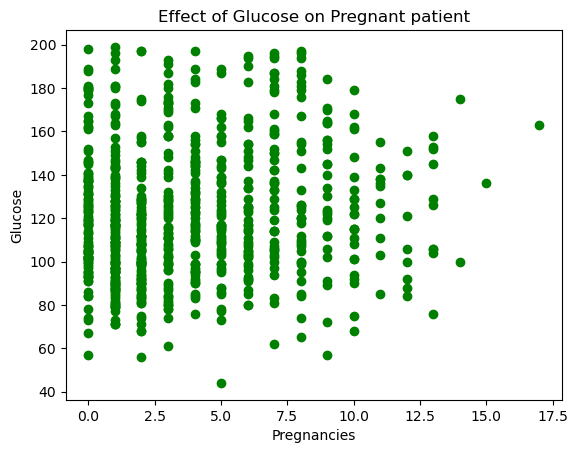

In [71]:
plt.scatter(df['Pregnancies'],df['Glucose'],c='green')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.title('Effect of Glucose on Pregnant patient')
#inference:- There is no relationship between pregnancies and glucose leve

Text(0.5, 1.0, 'BMI and Skinthickness')

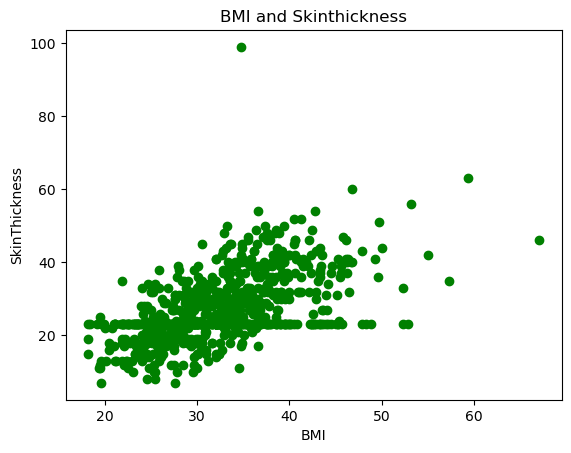

In [72]:
plt.scatter(df['BMI'],df['SkinThickness'],c='green')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('BMI and Skinthickness')

Text(0.5, 1.0, 'Effect of Glucose and Insulin intake regarding to age')

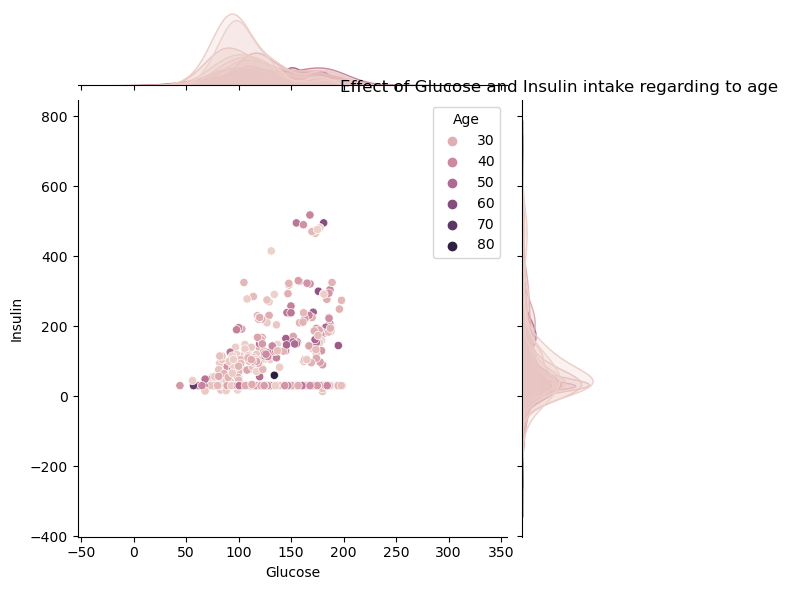

In [44]:
sns.jointplot(x='Glucose',y='Insulin',hue='Age',data=df_1)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Effect of Glucose and Insulin intake regarding to age')

In [45]:
#inference:-As the person ages,insulin shots are given even though the glucose ls between 150 and 200

Text(0, 0.5, 'Age')

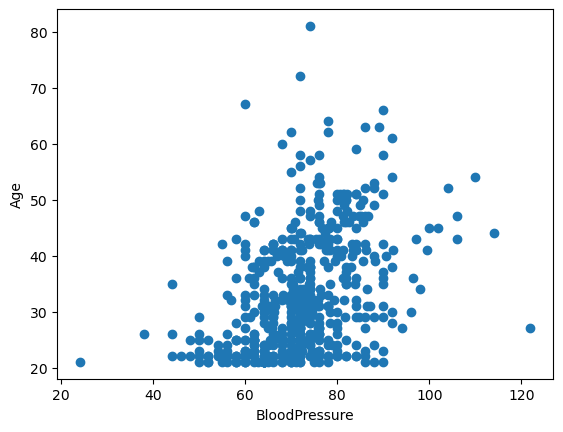

In [73]:
plt.scatter(x='BloodPressure',y='Age',data=df_1)
plt.xlabel('BloodPressure')
plt.ylabel('Age')
#inference:- For the age below 40, the pressure is below 100. As a person ages,
#the blood pressue increases or remain iwithin 45 to 100

<Figure size 1000x1000 with 0 Axes>

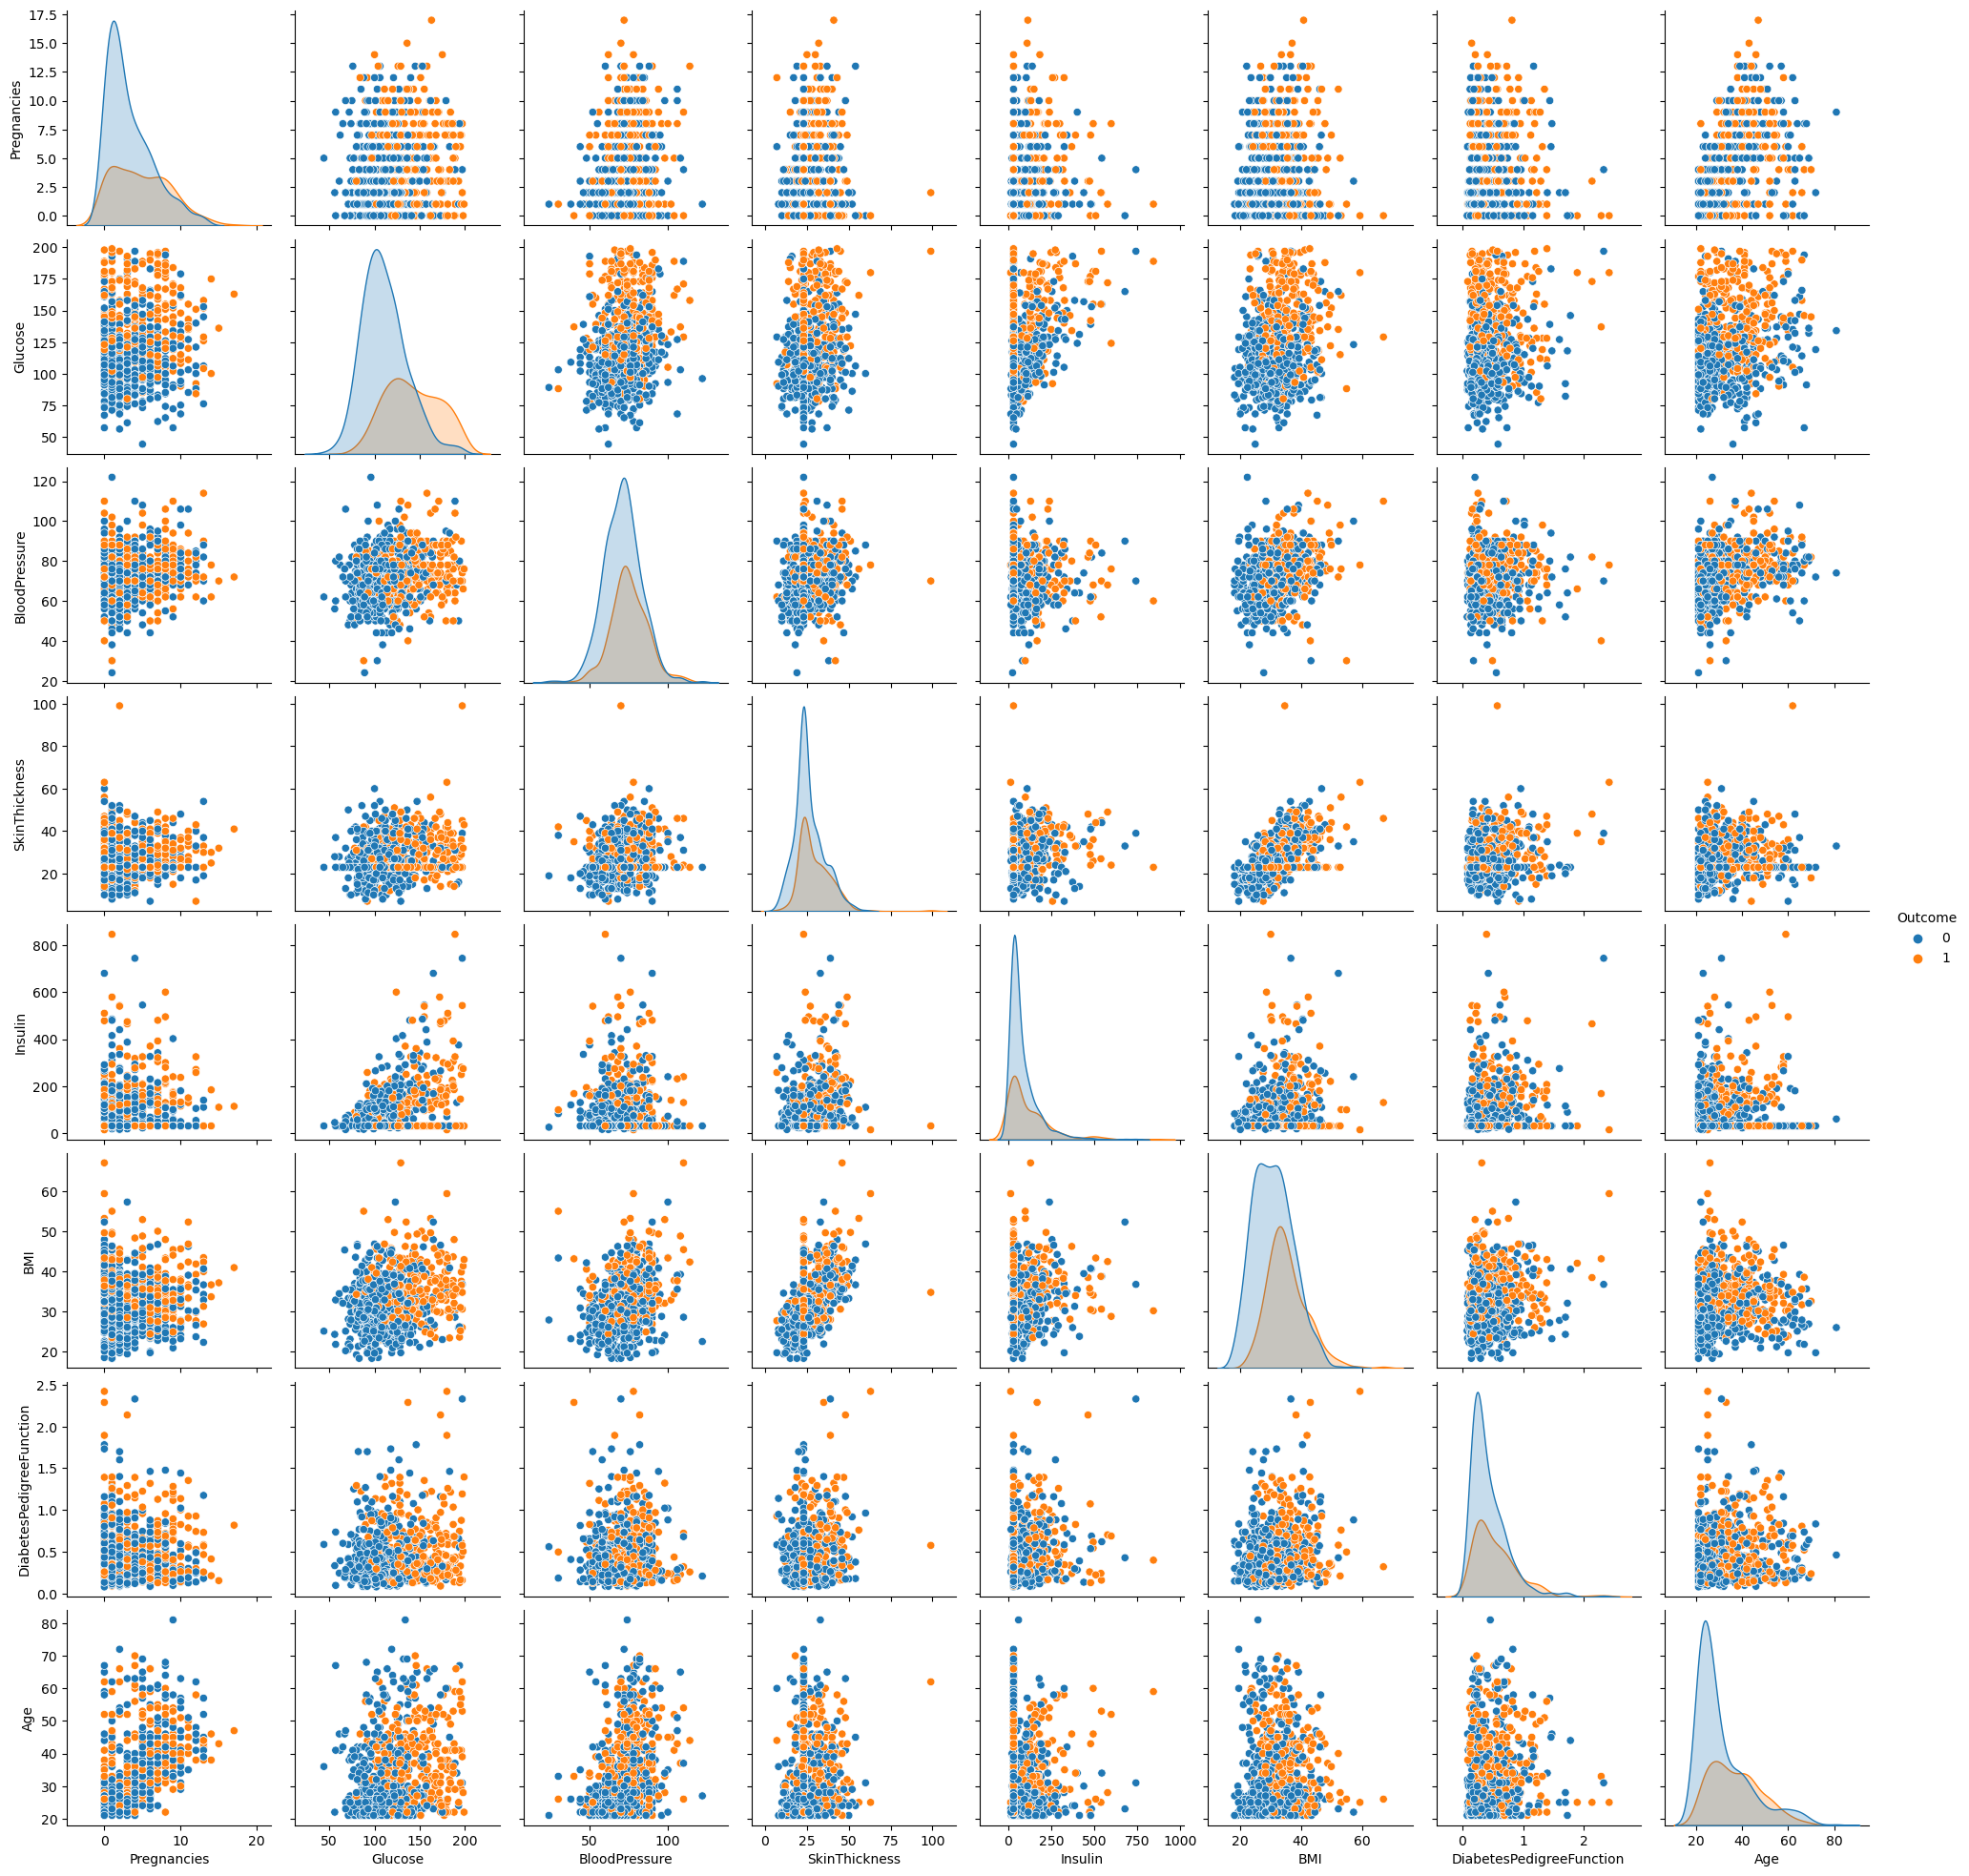

In [74]:
plt.figure(figsize=(10,10))
sns.pairplot(df, hue ='Outcome')

In [ ]:
#inference:= Compared to the same blood pressure range as the people with less BMI and people with more BMI,
#the people high high BMI tends to have diabetes
#inference:= Diabetes is diagnoised with aged people rather than younger people.
#inference:= Age is a factor in Diabetes diagnosis.As the people age,
#eventhough they have the have same BMI as the young people, they are diabetic patients.
##and it's the same for DiabetesPedigreeFunction

#### 6) Perform correlation analysis. Visually explore it using a heat map.

In [75]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

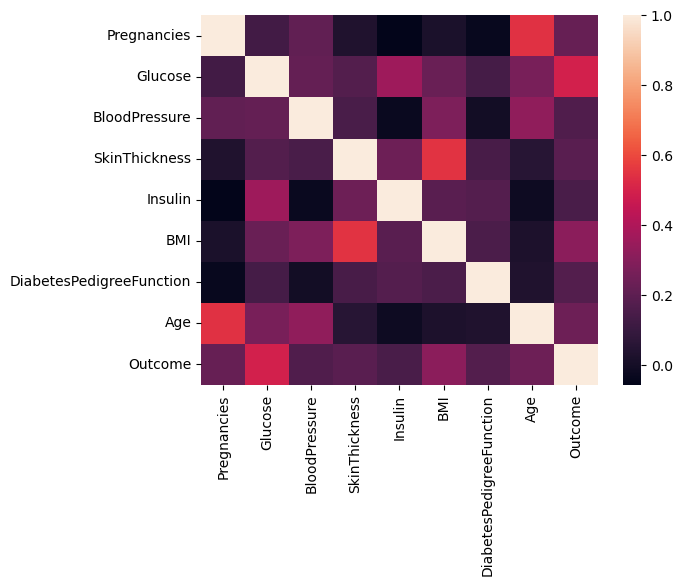

In [76]:
sns.heatmap(df.corr())

### Data Modeling:

#### 1)Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 



In [78]:
#For the model building

#### Comparison of models

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [81]:
classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
#minkowski appears by deafault in KNN. if p=2 then it implies we are using the euclidean distance
classification_models.append(('Kernel SVM', SVC(kernel = 'rbf',gamma='scale'))) #set gamma>0
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))

In [110]:
from sklearn.model_selection import KFold

In [114]:
#SMOTEEN
for name, model in classification_models:
    kfold = KFold(n_splits=10, random_state=(7), shuffle=(True))
    result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Logistic Regression: Mean Accuracy = 86.31% - SD Accuracy = 4.41%
K Nearest Neighbor: Mean Accuracy = 93.62% - SD Accuracy = 2.95%
Kernel SVM: Mean Accuracy = 88.52% - SD Accuracy = 3.80%
Naive Bayes: Mean Accuracy = 84.49% - SD Accuracy = 4.69%
Decision Tree: Mean Accuracy = 93.79% - SD Accuracy = 2.47%
Random Forest: Mean Accuracy = 96.35% - SD Accuracy = 2.82%


In [95]:
#SMOTE
for name, model in classification_models:
    kfold = KFold(n_splits=10, random_state=(7), shuffle=(True))
    result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Logistic Regression: Mean Accuracy = 75.90% - SD Accuracy = 5.36%
K Nearest Neighbor: Mean Accuracy = 75.40% - SD Accuracy = 3.98%
Kernel SVM: Mean Accuracy = 72.90% - SD Accuracy = 4.59%
Naive Bayes: Mean Accuracy = 72.60% - SD Accuracy = 4.96%
Decision Tree: Mean Accuracy = 75.80% - SD Accuracy = 3.28%
Random Forest: Mean Accuracy = 82.50% - SD Accuracy = 4.88%


In [97]:
#ADASYN
for name, model in classification_models:
    kfold = KFold(n_splits=10, random_state=(7), shuffle=(True))
    result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Logistic Regression: Mean Accuracy = 72.02% - SD Accuracy = 2.97%
K Nearest Neighbor: Mean Accuracy = 72.75% - SD Accuracy = 4.06%
Kernel SVM: Mean Accuracy = 69.32% - SD Accuracy = 5.17%
Naive Bayes: Mean Accuracy = 69.01% - SD Accuracy = 4.28%
Decision Tree: Mean Accuracy = 73.26% - SD Accuracy = 5.07%
Random Forest: Mean Accuracy = 81.04% - SD Accuracy = 3.21%


In [105]:
#ADASYN
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
for name, model in classification_models:
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print("Model :",model, classification_report(Y_test, Y_pred))

Model : LogisticRegression(solver='liblinear')               precision    recall  f1-score   support

           0       0.72      0.74      0.73        98
           1       0.73      0.71      0.72        95

    accuracy                           0.73       193
   macro avg       0.73      0.73      0.73       193
weighted avg       0.73      0.73      0.73       193

Model : KNeighborsClassifier()               precision    recall  f1-score   support

           0       0.76      0.64      0.70        98
           1       0.68      0.79      0.73        95

    accuracy                           0.72       193
   macro avg       0.72      0.72      0.71       193
weighted avg       0.72      0.72      0.71       193

Model : SVC()               precision    recall  f1-score   support

           0       0.69      0.70      0.70        98
           1       0.69      0.67      0.68        95

    accuracy                           0.69       193
   macro avg       0.69      0.69   

In [107]:
#SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
for name, model in classification_models:
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print("Model :",model, classification_report(Y_test, Y_pred))

Model : LogisticRegression(solver='liblinear')               precision    recall  f1-score   support

           0       0.79      0.70      0.74        99
           1       0.73      0.82      0.78       101

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200

Model : KNeighborsClassifier()               precision    recall  f1-score   support

           0       0.76      0.67      0.71        99
           1       0.71      0.79      0.75       101

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200

Model : SVC()               precision    recall  f1-score   support

           0       0.71      0.73      0.72        99
           1       0.73      0.71      0.72       101

    accuracy                           0.72       200
   macro avg       0.72      0.72   

In [100]:
#SMOTEEN
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
for name, model in classification_models:
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print("Model :",model, classification_report(Y_test, Y_pred))

Model : LogisticRegression(solver='liblinear')               precision    recall  f1-score   support

           0       0.82      0.91      0.86        54
           1       0.90      0.80      0.85        56

    accuracy                           0.85       110
   macro avg       0.86      0.86      0.85       110
weighted avg       0.86      0.85      0.85       110

Model : KNeighborsClassifier()               precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.90      0.95      0.92        56

    accuracy                           0.92       110
   macro avg       0.92      0.92      0.92       110
weighted avg       0.92      0.92      0.92       110

Model : SVC()               precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.86      0.88      0.87        56

    accuracy                           0.86       110
   macro avg       0.86      0.86   

#### 4. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

AUC RF: 0.99973 AUC KNN: 0.99246


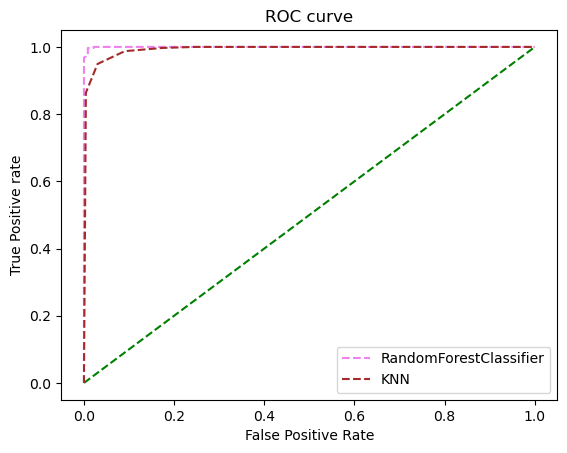

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

prob_RF=model.predict_proba(X)
model_KNN=KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)
model_KNN.fit(X_train,Y_train)
prob_KNN=model_KNN.predict_proba(X)

#plots the roc curve based of the probabilities
  

fpr, tpr, thresholds = roc_curve(Y,prob_RF[:,1],pos_label=1)
fpr1,tpr1,thresholds=roc_curve(Y,prob_KNN[:,1],pos_label=1)

# roc curve when tpr=fpr
ran_prob=[0 for i in range(len(Y))]
p_fpr,p_tpr, _ = roc_curve(Y,ran_prob,pos_label=1)

plt.plot(p_fpr, p_tpr, linestyle='--',color='green')
plt.plot(fpr, tpr, linestyle='--',color='violet', label='RandomForestClassifier')
plt.plot(fpr1, tpr1, linestyle='--',color='brown', label='KNN')

# plot the roc curve for the model
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
#plt.plot(fpr, tpr, marker='.')
plt.legend(loc='best')

# keep probabilities for the positive outcome only
#The AUC score can be computed using the roc_auc_score() method of sklearn: calculate AUC
auc_RF = roc_auc_score(Y, prob_RF[:, 1])
auc_KNN = roc_auc_score(Y, prob_KNN[:, 1])
print('AUC RF: %.5f' % auc_RF, 'AUC KNN: %.5f' % auc_KNN)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23.0,30.5,30.1,0.349,47,1
